In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv('df_total.csv')

# 'left'가 변수 이름에 들어간 열과 'label' 열을 선택하여 data_1로 저장
columns_to_select = [col for col in data.columns if 'left' in col] + ['label']
data_1 = data[columns_to_select].copy()

# data_1 확인
print(data_1.head())

   left_shoulder_x  left_shoulder_y  left_elbow_x  left_elbow_y  left_wrist_x  \
0         0.559085         0.248154      0.576515      0.335111      0.578194   
1         0.566747         0.246649      0.580898      0.336672      0.582456   
2         0.566942         0.247306      0.581850      0.334737      0.584192   
3         0.564737         0.247789      0.581491      0.332107      0.585759   
4         0.563946         0.246625      0.580856      0.330916      0.584990   

   left_wrist_y  left_hip_x  left_hip_y  left_knee_x  left_knee_y  \
0      0.411768    0.544376    0.423583     0.548772     0.559064   
1      0.415975    0.547931    0.419549     0.551115     0.559347   
2      0.410302    0.547981    0.425395     0.550966     0.563014   
3      0.409295    0.547576    0.428716     0.550251     0.566855   
4      0.409417    0.547740    0.431587     0.551146     0.570951   

   left_ankle_x  left_ankle_y       label  
0      0.555187      0.690537  bicep curl  
1      0.5

In [3]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [4]:
data

,label,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0,0.559085,0.248154,0.488198,0.253771,0.576515,0.335111,0.480004,0.343019,0.578194,...,0.503398,0.424794,0.548772,0.559064,0.505318,0.558147,0.555187,0.690537,0.509563,0.686598
1,0,0.566747,0.246649,0.494739,0.240690,0.580898,0.336672,0.483253,0.330128,0.582456,...,0.506776,0.417481,0.551115,0.559347,0.508047,0.558072,0.554556,0.690565,0.508918,0.683392
2,0,0.566942,0.247306,0.495606,0.253265,0.581850,0.334737,0.485987,0.339409,0.584192,...,0.507340,0.423140,0.550966,0.563014,0.508037,0.559864,0.554539,0.694536,0.508645,0.683752
3,0,0.564737,0.247789,0.490705,0.258034,0.581491,0.332107,0.482367,0.345214,0.585759,...,0.507195,0.430389,0.550251,0.566855,0.507212,0.562685,0.554834,0.693245,0.509084,0.684543
4,0,0.563946,0.246625,0.490965,0.255624,0.580856,0.330916,0.482423,0.337997,0.584990,...,0.507351,0.432617,0.551146,0.570951,0.506985,0.567747,0.555549,0.693762,0.509594,0.687588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,2,0.477161,0.328117,0.483735,0.327685,0.506722,0.386886,0.519883,0.392098,0.522002,...,0.463430,0.484948,0.502201,0.569866,0.505079,0.581495,0.484909,0.680384,0.481457,0.703205
699,2,0.487903,0.398567,0.493629,0.399755,0.521828,0.457479,0.527544,0.465557,0.535959,...,0.451973,0.531153,0.506089,0.584242,0.512502,0.585382,0.480578,0.681945,0.480020,0.689715
700,2,0.492772,0.449505,0.499529,0.459643,0.524592,0.514857,0.531811,0.527975,0.541290,...,0.445008,0.572071,0.494183,0.594218,0.510617,0.591012,0.478400,0.673847,0.481070,0.688650
701,2,0.490631,0.446330,0.497737,0.448744,0.523852,0.510450,0.531864,0.519772,0.540639,...,0.443254,0.566110,0.498149,0.573433,0.506485,0.593253,0.480255,0.667009,0.479965,0.696319


In [5]:
# 입력 데이터와 레이블 분리
X = data.drop(columns=['label'])
y = data['label']

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 모델 생성
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
epochs = 500  # 적당한 에포크 수
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/500
18/18 [==============================] - 0s 5ms/step - loss: 1.0455 - accuracy: 0.3968 - val_loss: 0.9629 - val_accuracy: 0.5745
Epoch 2/500
18/18 [==============================] - 0s 1ms/step - loss: 0.9807 - accuracy: 0.5107 - val_loss: 0.9032 - val_accuracy: 0.5745
Epoch 3/500
18/18 [==============================] - 0s 1ms/step - loss: 0.9280 - accuracy: 0.5214 - val_loss: 0.8600 - val_accuracy: 0.6454
Epoch 4/500
18/18 [==============================] - 0s 1ms/step - loss: 0.8772 - accuracy: 0.5765 - val_loss: 0.7953 - val_accuracy: 0.6525
Epoch 5/500
18/18 [==============================] - 0s 1ms/step - loss: 0.8137 - accuracy: 0.5925 - val_loss: 0.7415 - val_accuracy: 0.6596
Epoch 6/500
18/18 [==============================] - 0s 1ms/step - loss: 0.7509 - accuracy: 0.6584 - val_loss: 0.6780 - val_accuracy: 0.6809
Epoch 7/500
18/18 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.7349 - val_loss: 0.6289 - val_accuracy: 0.7801
Epoch 8/500
1

In [7]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

5/5 [==============================] - 0s 622us/step - loss: 0.0023 - accuracy: 1.0000
Test loss: 0.0023074871860444546
Test accuracy: 1.0


5/5 [==============================] - 0s 476us/step


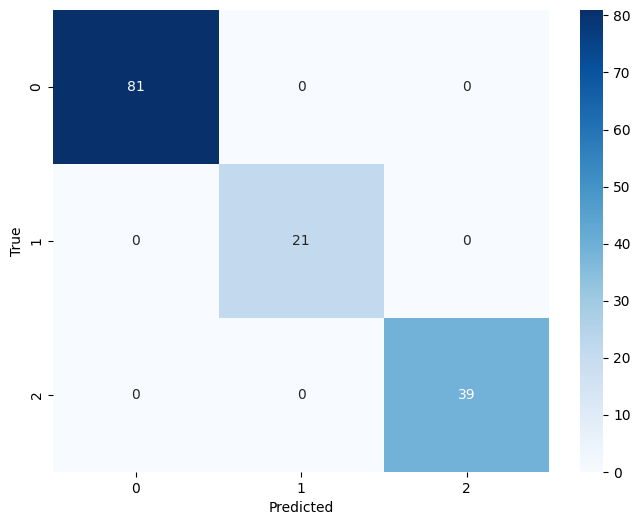

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        39

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터에 대한 예측값을 얻습니다
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix를 생성합니다
cm = confusion_matrix(y_test, y_pred_classes)

# Confusion Matrix를 시각화합니다
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 분류 리포트를 출력합니다
print(classification_report(y_test, y_pred_classes))

In [9]:
model.save('model/3_detection.h5')

/Users/gwon-yeonghyeon/anaconda3/envs/DL/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
